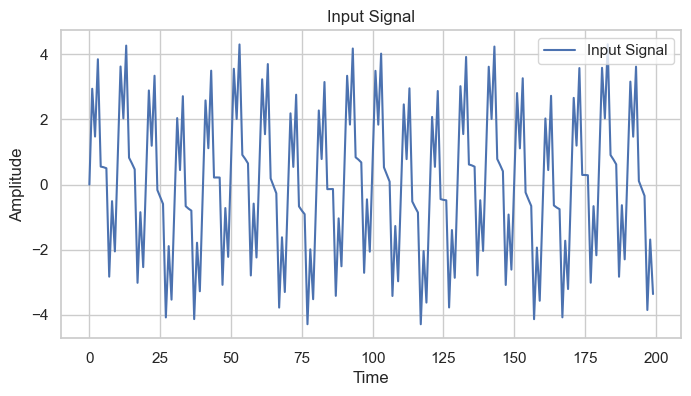

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

def plot_graph(input_array, title):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label=title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_input_output(input_array, output_array):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label='Input')
    plt.plot(output_array, label='Output')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Input vs Output')
    plt.legend()
    plt.show()

inputSignal = np.loadtxt('input.csv', delimiter=',', dtype=float)

plot_graph(inputSignal[:200], title="Input Signal")

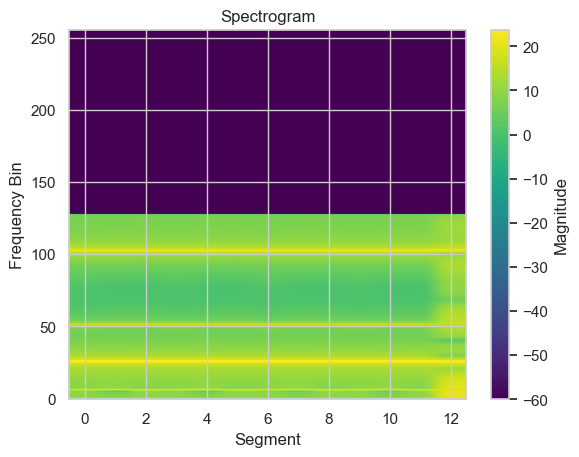

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Load spectrogram data from CSV file
spectrogram_data = np.loadtxt('spec1.csv', delimiter=',', dtype=float)

# Plot spectrogram
plt.imshow(spectrogram_data.T, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.xlabel('Segment')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram')
plt.show()


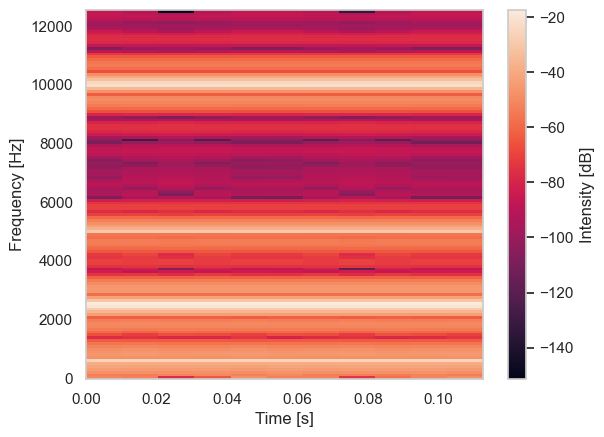

In [71]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Generate spectrogram
nperseg = 256  # Length of each segment
noverlap = 0.5  # Overlap between segments
f, t, Sxx = scipy.signal.spectrogram(inputSignal, fs=25000, nperseg=nperseg, noverlap=noverlap)

# Plot spectrogram
plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Convert to dB
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Intensity [dB]')
plt.show()
